In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
seed = 42

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR

In [6]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("Shoes_Data.csv")

In [10]:
data.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [11]:
print (data.dtypes)

title                  object
price                  object
rating                 object
total_reviews          object
product_description    object
reviews                object
reviews_rating         object
Shoe Type              object
dtype: object


In [12]:
data['price'] = data['price'].apply(lambda x: x.replace('₹', '')).astype('float')

In [13]:
data['price'].describe()

count    1230.000000
mean     2031.842268
std      1729.425360
min       127.000000
25%       622.250000
50%      1588.000000
75%      2844.687500
max      7992.000000
Name: price, dtype: float64

In [14]:
data.shape

(1230, 8)

<AxesSubplot:xlabel='price'>

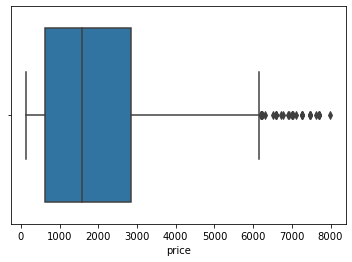

In [15]:
sns.boxplot(x=data['price'])

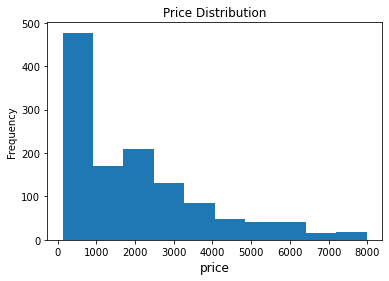

In [16]:
# Plot Price Distribution
data['price'].plot.hist()
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.show()

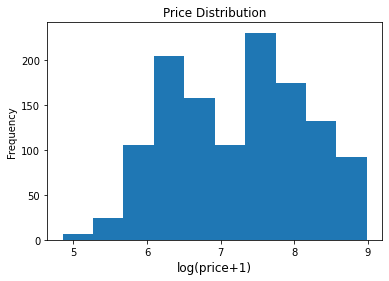

In [17]:
np.log(data['price']+1).plot.hist()
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.show()

In [18]:
print('There are %d items that do not have a description.' %data['product_description'].isnull().sum())

There are 0 items that do not have a description.


In [19]:
data.item_description = data['product_description'].astype(str)

descr = data[['product_description', 'price']]
descr['count'] = descr['product_description'].apply(lambda x : len(str(x)))
descr.head()

<ipython-input-19-79dfaf43f9dc>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.item_description = data['product_description'].astype(str)
<ipython-input-19-79dfaf43f9dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr['count'] = descr['product_description'].apply(lambda x : len(str(x)))


,product_description,price,count
0,Elevate your style with this classy pair of Ru...,279.0,222
1,The product will be an excellent pick for you....,479.0,78
2,Flaunt with these stylish and unique red casua...,430.0,398
3,Robbie Jones Shoes Are Designed To Keeping In ...,499.0,576
4,Sparx is a spectacular range of footwear from ...,499.0,1030


In [20]:
data['product_description'].value_counts().head(10)

The product will be an excellent pick for you. It ensures an easy maintenance.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          29
Flavia shoes are a perfect blend of elegance & style classy & fabulous breaki

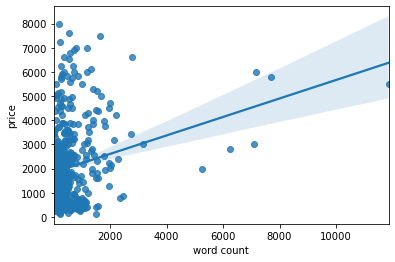

In [21]:
df = descr.groupby('count')['price'].mean().reset_index()
sns.regplot(x=df["count"], y=(df["price"]))
plt.xlabel("word count")
plt.show()

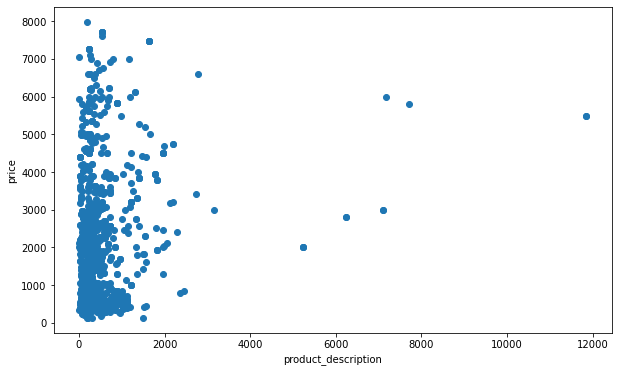

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['product_description'].apply(len), data['price'])
ax.set_xlabel('product_description')
ax.set_ylabel('price')
plt.show()

In [23]:
from string import punctuation
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))

In [24]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [25]:
import string

# Create a function to remove punctuations
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Create a function to remove stop words
def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

# Create a function to lowercase the words
def to_lower(x):
    return x.lower()

In [26]:
#from nltk.stem.porter import PorterStemmer
#porter = PorterStemmer()
#data['product_description'] = data['product_description'].apply(porter.stem)
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

data['product_description'] = data['product_description'].apply(snow_stemmer.stem)
data['product_description'] = data['product_description'].apply(remove_punctuation)
data['product_description'] = data['product_description'].apply(remove_stop_words)
data['product_description'] = data['product_description'].apply(to_lower)

In [27]:
cv = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4, stop_words='english')
X = cv.fit_transform(data['product_description'].values)
y = np.log1p(data['price'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [28]:
regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.5388715700049622

In [29]:
regressor = SGDRegressor(max_iter=1000, alpha=0.00001)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

1.3321209872072792

In [30]:
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from random import uniform
from random import randint as sp_randint

In [31]:
train_X = lgb.Dataset(X, label=y)

In [32]:
params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

In [33]:
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200, verbose_eval=100)

In [34]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.24683840403261134

Модель LGBM показала себя лучше чем Ridge и SGDRegressor

In [48]:
df = data[["reviews", "reviews_rating"]]
df.head()

,reviews,reviews_rating
0,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...
1,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...
2,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
3,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...
4,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...


In [49]:
rev  = []
rating = []

for j in df.index:
    lst = [i for i in df.iloc[j].reviews.split('||')]
    for k in lst:
        rev.append(k)
        
for j in df.index:
    lst = [i for i in df.iloc[j].reviews_rating.split('||')]
    for k in lst:
        rating.append(k)
        
df = pd.DataFrame(list(zip(rev, rating)),
               columns =['reviews', 'reviews_rating'])

In [55]:
df.head()

,reviews,reviews_rating
0,happy product,1
1,expected,1
2,average product,3
3,pic beauti,3
4,got damage product quality average 300₹,3


In [52]:
import re
def get_first_digit(text):
    match = re.search(r'\d', text)
    return match[0]
df['reviews_rating']=df['reviews_rating'].apply(get_first_digit)

In [ ]:
df['reviews'] = df['reviews'].apply(snow_stemmer.stem)
df['reviews'] = df['reviews'].apply(remove_punctuation)
df['reviews'] = df['reviews'].apply(remove_stop_words)
df['reviews'] = df['reviews'].apply(to_lower)

df['reviews_rating'] = df['reviews_rating'].apply(snow_stemmer.stem)
df['reviews_rating'] = df['reviews_rating'].apply(remove_punctuation)
df['reviews_rating'] = df['reviews_rating'].apply(remove_stop_words)
df['reviews_rating'] = df['reviews_rating'].apply(to_lower)

In [57]:
df = df[~df.reviews.str.contains("report")]
df = df[~df.reviews.str.contains("verified")]

In [58]:
df['reviews'].value_counts()

 good                                                        440
 good product                                                190
 nice                                                        131
 comfort                                                     121
 value money                                                 105
                                                            ... 
 received damagedtorn shoes  additional amazon packing us      1
 two year old product                                          1
 lit much weight                                               1
 light weight comfy badminton sho                              1
 fake product bad qu                                           1
Name: reviews, Length: 4465, dtype: int64

In [63]:
print (df.dtypes)

reviews            object
reviews_rating    float64
dtype: object


In [62]:
df['reviews_rating'] = df['reviews_rating'].astype('float')

In [64]:
df['reviews_rating'].describe()

count    8816.000000
mean        3.708711
std         1.548093
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

In [65]:
cv = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4, stop_words='english')
X = cv.fit_transform(df['reviews'])
y = df['reviews_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [66]:
X.shape, y.shape

((8816, 528), (8816,))

In [68]:
from sklearn.svm import LinearSVC

In [76]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [77]:
y_pred = clf.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.69      0.59      0.64       409
         2.0       0.27      0.11      0.15       111
         3.0       0.36      0.22      0.27       199
         4.0       0.39      0.12      0.19       408
         5.0       0.64      0.92      0.75      1077

    accuracy                           0.61      2204
   macro avg       0.47      0.39      0.40      2204
weighted avg       0.56      0.61      0.55      2204



accuracy 0,61, рейтинг 5 предсказывается лучше всех